In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import re
import nltk

In [2]:
# Use a raw string for the path to avoid issues with backslashes in file paths
file_path = r'C:\Users\abdal\Music\Student Recomendation\std.xlsx'

# Try reading the Excel file with error handling
try:
    sr = pd.read_excel(file_path, engine='openpyxl')
    print("Data loaded successfully!")
    print(sr.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print("The file was not found. Check the filename and path.")
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")


The file was not found. Check the filename and path.


               NO     Tarbiyo       Arabi     Biology   Chemistry     Physics  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean   150.500000   78.123333   75.540000   75.720000   75.083333   73.613333   
std     86.746758   14.647981   14.079863   15.456323   14.853681   14.866760   
min      1.000000   50.000000   50.000000   50.000000   50.000000   50.000000   
25%     75.750000   65.000000   64.000000   62.000000   62.000000   61.000000   
50%    150.500000   80.000000   75.000000   75.500000   76.000000   72.000000   
75%    225.250000   91.000000   87.000000   90.000000   87.000000   85.000000   
max    300.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

             Math     History   Geography      Somali    Business  Technology  
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000  
mean    75.756667   76.013333   74.650000   74.903333   73.960000   75.146667  
std     15.271592   14.970422 

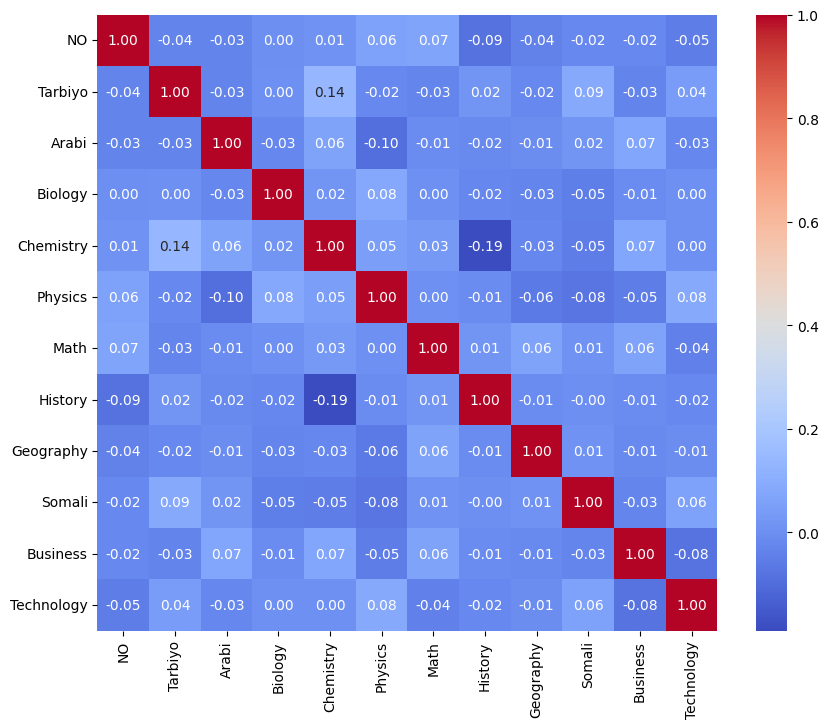

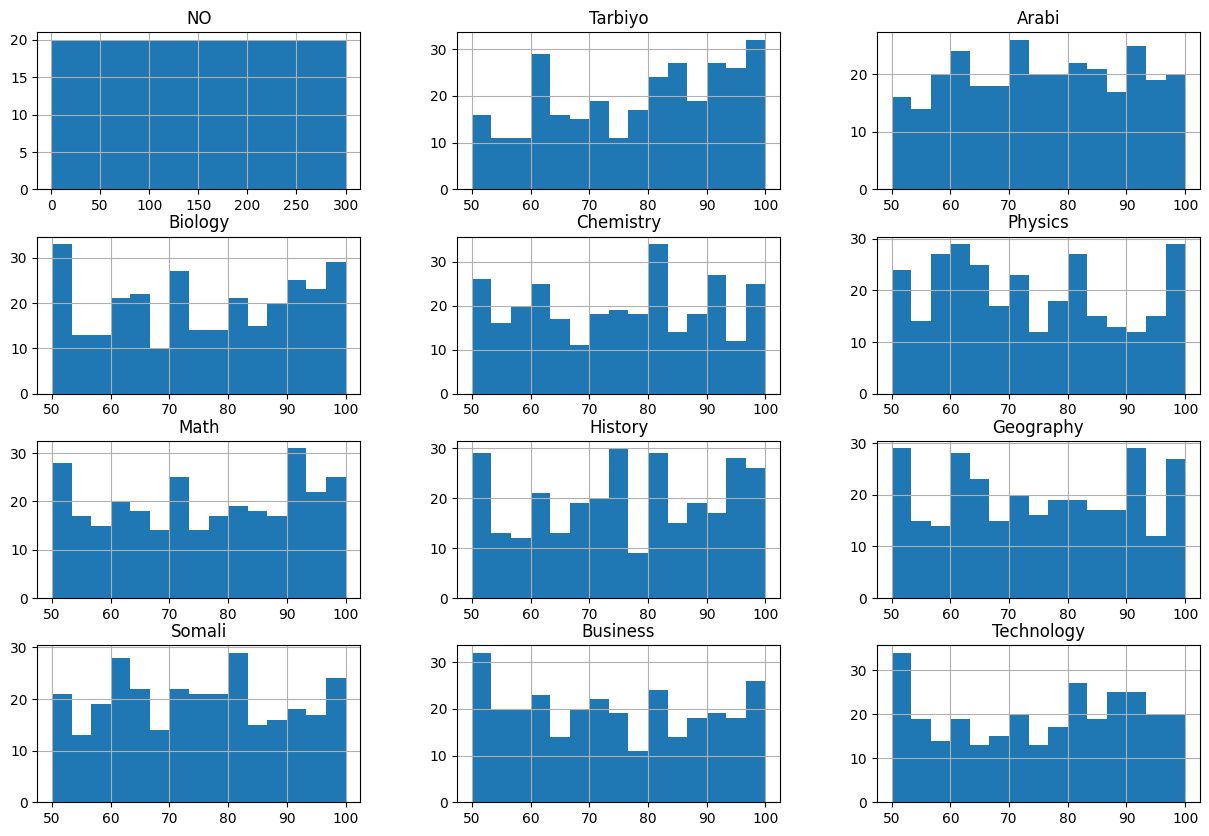

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = r'C:\Users\abdal\Music\Student Recomendation\std.csv'
std = pd.read_csv(data_path)

# Display a statistical summary for numeric data
print(std.describe())

# Select only numeric columns for correlation matrix
numeric_std = std.select_dtypes(include=['float64', 'int64'])

# Correlation matrix heatmap for numeric columns only
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_std.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Histograms for each numeric feature
numeric_std.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.show()


In [9]:
import pandas as pd

# Load the data
data_path = r'C:\Users\abdal\Music\Student Recomendation\std.csv'
std = pd.read_csv(data_path)

# Assuming 'Recommended Field' is a categorical column, calculate its frequency
frequency_table = std['Recommended Field'].value_counts()

# Print the frequency table
print("Frequency Table for the 'Recommended Field':")
print(frequency_table)


Frequency Table for the 'Recommended Field':
Recommended Field
Medicine          149
Computing          70
Islamic fields     40
Social Science     22
Undecided          14
Business            5
Name: count, dtype: int64


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
print("Training accuracy:", model.score(X_train, y_train))
print("Testing accuracy:", model.score(X_test, y_test))


Training accuracy: 0.8971689415976728
Testing accuracy: 0.3483431873749723


In [27]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('student_data.csv')

# Display the first few rows of the dataframe
print(df.head())


   NO  Tarbiyo  Arabi  Biology  Chemistry  Physics  Math  History  Geography  \
0   1       70     63       81         69       77    94       73         64   
1   2       98     73       59         50       63    92       51         77   
2   3       90     73       94         97       76    89       52         89   
3   4       60     97       73         94       88    66       79         66   
4   5       86     52       99         88       73    77       58         63   

   Somali  Business  Technology Recommended Field  
0      89        76          67           Science  
1      63        76          59        Technology  
2      53        97          74           Science  
3      53        64          68           Science  
4      57        78          67           Science  


In [8]:
# Re-import necessary libraries and reload the data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load the data again
data_path = r'C:\Users\abdal\Music\Student Recomendation\std.csv'
student_data = pd.read_csv(data_path)

# Encoding the target variable
label_encoder = LabelEncoder()
student_data['Encoded Field'] = label_encoder.fit_transform(student_data['Recommended Field'])

# Splitting the dataset into features and target variable
X = student_data.drop(['NO', 'Recommended Field', 'Encoded Field'], axis=1)
y = student_data['Encoded Field']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirming the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((240, 11), (60, 11), (240,), (60,))

In [38]:
# Predict on the test set
y_pred = random_forest_model.predict(X_test)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(y_pred, columns=['Predicted Field'])

# Count the occurrence of each predicted category
prediction_counts = predictions_df['Predicted Field'].value_counts()

# Print the prediction occurrences
print(prediction_counts)


Predicted Field
3    33
1    20
2     4
4     3
Name: count, dtype: int64


Confusion matrix, without normalization


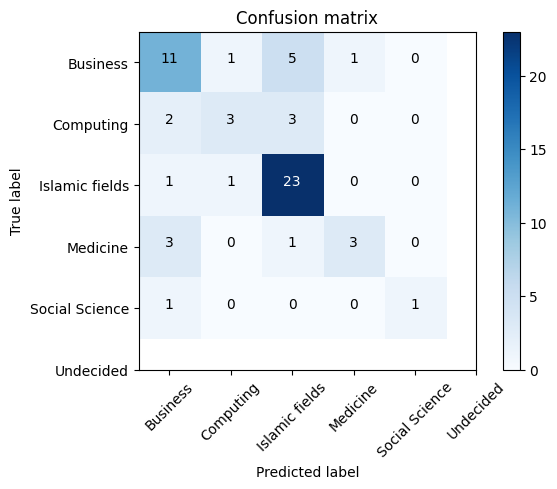

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Load your data
data_path = r'C:\Users\abdal\Music\Student Recomendation\std.csv'
data = pd.read_csv(data_path)
X = data.iloc[:, :-1]  # assuming the last column is the target
y = data.iloc[:, -1]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
classes = label_encoder.classes_

# Plot confusion matrix
plot_confusion_matrix(cm, classes=classes)
plt.show()


In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Path to the CSV file
csv_path = r'C:\Users\abdal\Music\Student Recomendation\std.csv'

# Load the dataset
df = pd.read_csv(csv_path)

# List all subjects as features
features = [
    'Tarbiyo', 'Arabi', 'Biology', 'Chemistry', 'Physics',
    'Math', 'History', 'Geography', 'Somali', 'Business', 'Technology'
]

# Select features (all subjects) and target (the field of study)
X = df[features]  # Features
y = df['Recommended Field']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Save the trained model to a file
model_save_path = r'C:\Users\abdal\Music\Student Recomendation\rf_model.joblib'
joblib.dump(rf_model, model_save_path)


Accuracy: 0.72


['C:\\Users\\abdal\\Music\\Student Recomendation\\rf_model.joblib']

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your data (modify the path accordingly)
df = pd.read_csv('std.csv')

# Prepare label encoder for readable output
le = LabelEncoder()
df['Recommended Field'] = le.fit_transform(df['Recommended Field'])

# Features and Target
X = df.drop(['NO', 'Recommended Field'], axis=1)
y = df['Recommended Field']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Function to predict the field based on user input
def predict_field():
    print("Please enter your marks for the following subjects:")
    inputs = {}
    for subject in X.columns:
        inputs[subject] = int(input(f"{subject}: "))
    
    # Convert the user inputs into a DataFrame
    user_df = pd.DataFrame([inputs])
    
    # Make prediction
    pred = rf_model.predict(user_df)
    field = le.inverse_transform(pred)[0]  # Decode the predicted label
    
    print(f"\nBased on your marks, the recommended field is: {field}")

# Call the function to get user input and predict the field
predict_field()


Please enter your marks for the following subjects:

Based on your marks, the recommended field is: Social Science


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import joblib

# Load some example data
data = load_iris()
X, y = data.data, data.target

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

# Define the path where you want to save the model
path = r'C:\Users\abdal\Music\Student Recomendation\rf_model.joblib'

# Save the model
joblib.dump(model, path)


['C:\\Users\\abdal\\Music\\Student Recomendation\\rf_model.joblib']